In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Datasets/graduate-admissions/Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
continuous_features = data[['CGPA']].values
categorical_research_features = data[ [ 'Research' ] ].values

In [4]:
X = np.concatenate([continuous_features,],axis=1)
Y = data[['Chance of Admit ']].values

In [5]:
train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

In [6]:
X = tf.constant( train_features , dtype=tf.float32 )
Y = tf.constant( train_labels , dtype=tf.float32 ) 

In [7]:
test_X = tf.constant( test_features , dtype=tf.float32 ) 
test_Y = tf.constant( test_labels , dtype=tf.float32 ) 

In [8]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [9]:
num_epochs = 100
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices((X,Y))
dataset = dataset.shuffle(500).repeat(num_epochs).batch(batch_size)
iterator = dataset.__iter__()

In [10]:
num_features = X.shape[1]
weights = tf.random.normal((num_features,1))
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range(num_epochs):
    epoch_loss = list()
    for b in range(int(num_samples/batch_size)):
        x_batch,y_batch = iterator.get_next()
        
        output = h(x_batch, weights, bias )
        loss = epoch_loss.append(mean_squared_error(y_batch,output).numpy())
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
        
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss )
    
    print( 'Loss is {}'.format( loss ) ) 

Loss is 6.755967617034912
Loss is 0.009115485474467278
Loss is 0.009132610633969307
Loss is 0.009098891168832779
Loss is 0.009107118472456932
Loss is 0.00910294521600008
Loss is 0.009145637974143028
Loss is 0.009081226773560047
Loss is 0.009131932631134987
Loss is 0.00909249298274517
Loss is 0.00904613547027111
Loss is 0.009104236960411072
Loss is 0.009097863920032978
Loss is 0.009119682013988495
Loss is 0.009146308526396751
Loss is 0.009104455821216106
Loss is 0.009092080406844616
Loss is 0.00911649502813816
Loss is 0.00906780082732439
Loss is 0.009123330004513264
Loss is 0.009089578874409199
Loss is 0.009022913873195648
Loss is 0.009202192537486553
Loss is 0.009108895435929298
Loss is 0.009116074070334435
Loss is 0.009158903732895851
Loss is 0.009144380688667297
Loss is 0.009022438898682594
Loss is 0.009156739339232445
Loss is 0.009095225483179092
Loss is 0.009049389511346817
Loss is 0.009106585755944252
Loss is 0.009117882698774338
Loss is 0.00909229926764965
Loss is 0.0090472549200

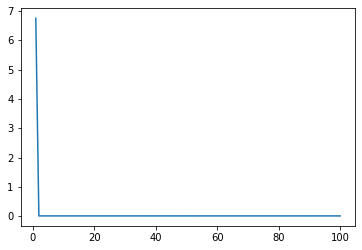

In [11]:
import matplotlib.pyplot as plt
plt.plot( epochs_plot , loss_plot ) 
plt.show()

In [12]:
output = h( test_X , weights , bias ) 
labels = test_Y

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() ) )


Mean Absolute Error = 0.0716073289513588


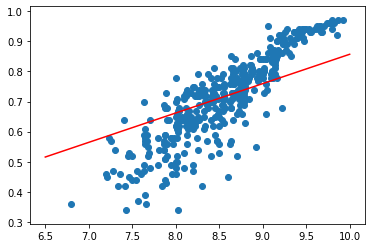

In [18]:
plt.scatter(X,Y)
x = np.linspace(6.5,10,100)
y = (weights[0])*x+bias
plt.plot(x,y,'-r')
plt.show()

In [14]:
output = h( test_X , weights , bias ) 
labels = test_Y

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() ) )


Mean Absolute Error = 0.0716073289513588
